**Work-in-Progress Convolutional Neural Network Model for Gravitational Wave Signal Classification**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, ReLU, MaxPooling1D, Flatten, Dense, Softmax

import gdown

2024-06-08 23:49:55.272627: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_directory = ''

**Defining a Function for Generating Convolutional Blocks**

In [3]:
def convolutional_layer_block(filters, kernel_size, strides=1, pool_size=4, input_shape=None):
    
    block = Sequential()
    
    if input_shape:
        block.add(Conv1D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same', input_shape=input_shape))
    else:
        block.add(Conv1D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same'))
    
    block.add(ReLU())
    block.add(BatchNormalization())
    
    block.add(Conv1D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same'))
    block.add(ReLU())
    block.add(BatchNormalization())
    
    block.add(Conv1D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same'))
    block.add(ReLU())
    block.add(BatchNormalization())
    
    block.add(MaxPooling1D(pool_size=pool_size))
    
    return block

**Defining a Function for Generating Dense Neuron Blocks**

In [4]:
def dense_layer_block(neurons, input_shape=None):
    
    block = Sequential()
    
    if input_shape:
        block.add(Dense(neurons, input_shape=input_shape))
    else:
        block.add(Dense(neurons))
        
    block.add(ReLU())
    block.add(BatchNormalization())
    
    return block

**Defining a Function for Producing a Softmax Output Block**

**Initializing the Model**

In [5]:
model = Sequential()

2024-06-08 23:49:58.882824: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9622 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:64:00.0, compute capability: 7.5


**First CNN Layer** <br>
32 Filter Convolutional Block

In [6]:
model.add(convolutional_layer_block(filters=32, kernel_size=3, input_shape=(4096,1)))

**Second CNN Layer** <br>
64 Filter Convolutional Block

In [7]:
model.add(convolutional_layer_block(filters=64, kernel_size=3))

**Third CNN Layer** <br>
128 Filter Convolutional Block

In [8]:
model.add(convolutional_layer_block(filters=128, kernel_size=3))

**Fourth CNN Layer** <br>
256 Filter Convolutional Block

In [9]:
model.add(convolutional_layer_block(filters=256, kernel_size=3, pool_size=1))

**Fifth CNN Layer** <br>
Flattening Block

In [10]:
model.add(Flatten())

**Sixth CNN Layer** <br>
128-Neuron Dense Block

In [11]:
model.add(dense_layer_block(neurons=128))

**Seventh CNN Layer** <br>
164-Neuron Dense Block

In [12]:
model.add(dense_layer_block(neurons=64))

**Eighth CNN Layer** <br>
4-Neuron Dense Block

In [13]:
model.add(dense_layer_block(neurons=3))

**Ninth CNN Layer** <br>
Softmax Output Block

In [14]:
model.add(Softmax())

**Model Compiling Stage**

In [15]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [16]:
def generate_time_series(num_samples, sequence_length):
    X = []
    y = []

    for i in range(num_samples):
        
        class_label = np.random.randint(0, 3)
        
        
        if class_label == 0:
            
            time_series = np.sin(np.arange(sequence_length) * np.pi / 10)
        elif class_label == 1:
            
            time_series = np.arange(sequence_length) / sequence_length
        else:
            
            time_series = np.random.rand(sequence_length)

        
        X.append(time_series)
        y.append(class_label)

    return np.array(X), np.array(y)

In [17]:
def generate_noisy_data(num_samples, sequence_length, sampling_rate=4096, amplitude=1, noise_level=0.5):
    X = []
    y = []

    for i in range(num_samples):

        t = np.linspace(0, sequence_length / sampling_rate, sequence_length)
        
        # Generate chirp signal waveform
        waveform = amplitude * np.sin(2 * np.pi * 30 * t**2)
        
        # Add Gaussian noise
        noise = noise_level * np.random.randn(sequence_length)
        signal = waveform + noise
        
        X.append(signal)
        y.append(1)
        
    return np.array(X), np.array(y)

X_train, y_train = generate_noisy_data(num_samples=10000, sequence_length=4096)
X_test, y_test = generate_noisy_data(num_samples=2000, sequence_length=4096)

X_train = X_train.reshape(-1, 4096, 1)
X_test = X_test.reshape(-1, 4096, 1)

In [18]:
# Generate sample time series data
#X_train, y_train = generate_time_series(num_samples=10000, sequence_length=100)
#X_test, y_test = generate_time_series(num_samples=10000, sequence_length=100)


# Reshape the data to fit the expected input shape of the model
#X_train = X_train.reshape(-1, 100, 1)
#X_test = X_test.reshape(-1, 100, 1)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/20


2024-06-08 23:50:10.425278: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-06-08 23:50:11.441975: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f572494def0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-08 23:50:11.442021: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-06-08 23:50:11.448846: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-08 23:50:11.599644: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 [==============================] - 23s 30ms/step - loss: 0.9724 - accuracy: 0.8092 - val_loss: 0.3984 - val_accuracy: 1.0000
Epoch 2/20
250/250 [==============================] - 7s 27ms/step - loss: 0.6927 - accuracy: 1.0000 - val_loss: 0.5018 - val_accuracy: 1.0000
Epoch 3/20
250/250 [==============================] - 7s 27ms/step - loss: 0.5085 - accuracy: 1.0000 - val_loss: 0.4331 - val_accuracy: 1.0000
Epoch 4/20
250/250 [==============================] - 7s 27ms/step - loss: 0.3788 - accuracy: 1.0000 - val_loss: 0.3271 - val_accuracy: 1.0000
Epoch 5/20
250/250 [==============================] - 6s 26ms/step - loss: 0.2876 - accuracy: 1.0000 - val_loss: 0.2519 - val_accuracy: 1.0000
Epoch 6/20
250/250 [==============================] - 6s 26ms/step - loss: 0.2228 - accuracy: 1.0000 - val_loss: 0.1971 - val_accuracy: 1.0000
Epoch 7/20
250/250 [==============================] - 6s 24ms/step - loss: 0.1757 - accuracy: 1.0000 - val_loss: 0.1567 - val_accuracy: 1.0000
Epoch 8/2

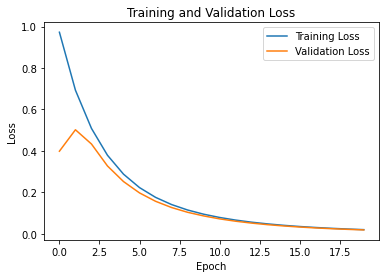

In [19]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()